In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def gradDescent(n):
    v = np.zeros((2,n+2))
    h = 1/(n+1)
    w = 1
    for i in range(10000):
        if i == 0:
            for j in range(n+2):
                if j == 0 or j == n-1:
                    v[0][j] = 0
                else:
                    v[0][j] = 1/4*((1/(np.exp(2)+1))*np.exp(2*j*h) + (1/(np.exp(-2)+1))*np.exp(-2*j*h)-1 )
        for k in range(2,n+2):
            v[1][k-1] = v[0][k-1] - w*(2*v[0][k-1]-v[0][k-2] -v[0][k] + 4*(h**2)*((2/3)*v[0][k-1] + (1/6)*v[0][k-2] + (1/6)*v[0][k]) - 2*k*(h**3)*(np.cos(v[0][k])))
        
        sum1 = 0
        sum2 = 0
        for z in range(2,n+2):
            sum1 += ( (1/h)*((v[0][z-1])**2 -v[0][k-2]*v[0][k-1] - v[0][k-1]*v[0][k]) + 4*h*((1/3)*(v[0][k-1])**2 + (1/6)*(v[0][k-1]*v[0][k-2]) + (1/6)*(v[0][k-1]*v[0][k]) - 2*(h**2))*z*np.sin(v[0][k-1]) + h*v[0][k-1])
            sum2 += ( (1/h)*((v[1][z-1])**2 -v[1][k-2]*v[1][k-1] - v[1][k-1]*v[1][k]) + 4*h*((1/3)*(v[1][k-1])**2 + (1/6)*(v[1][k-1]*v[1][k-2]) + (1/6)*(v[1][k-1]*v[1][k]) - 2*(h**2))*z*np.sin(v[1][k-1]) + h*v[1][k-1])
        if sum2 >= sum1 :
            w /= 10000
        if sum2 < sum1 :
            v[0,:] = v[1, :]  
    return v[1,1:n+1]

In [71]:
np.cos(3)

-0.9899924966004454

In [23]:
x = gradDescent(9)
x2 = gradDescent(99)

In [24]:
x_ = np.linspace(0,1,100)
y_ = np.zeros(len(x_))
y_2 = np.zeros(len(x_))
for i in range(len(x_)):
    for j in range(len(x)):
        y_[i] += x[j]*np.exp(x_[i]-x_[j])
for i in range(len(x_)):
    for j in range(len(x2)):
        y_2[i] += x2[j]*np.exp(x_[i]-x_[j])
        

Text(0, 0.5, 'u(x)')

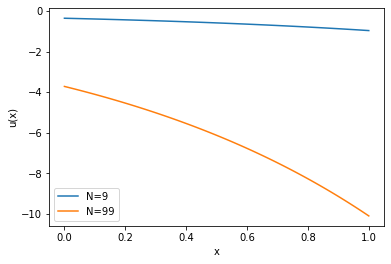

In [25]:
plt.plot(x_,y_)
plt.plot(x_,y_2)
plt.legend(['N=9','N=99'])
plt.xlabel('x')
plt.ylabel('u(x)')